
Accuracy CV fold 1 :  0.8079470198675497

Accuracy CV fold 2 :  0.8145695364238411

Accuracy CV fold 3 :  0.8333333333333334

Accuracy CV fold 4 :  0.8120805369127517

Accuracy CV fold 5 :  0.7785234899328859


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


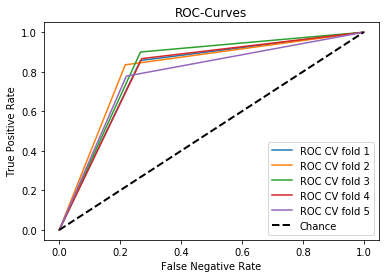

In [26]:
import numpy as np
import pandas as pd
from sklearn import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



""" TODO:"""
# May need to apply shift scaling, such as min-max or standardization

# Later change the current spliting from the whole data to the extra data \
#     "Test" should later be "songs_to_classify.csv"

# Apply cross_validation to improve test accuracy

# Test diffrent methods:
"""
1) Logistic Regression: Logistic Regression, Naive Bayes Classifier
2) Discriminant analysis: LDA, QDA
3) Decision Trees <- Especially Bagging, but also reandomForrest
4) Boosted Trees  <- Boosting seemed to do very well
5) Random Forest  <- Seemed good
6) K-Nearest Neighbor
-------------------
7) Neural Networks
8) Support Vector Machines (SVM) <- Good, but not learned yet

"""



"""
Categories:
-----------
danceability
energy
key
loudness
mode
speechiness
acousticness
label
"""


# Read data
songs = pd.read_csv('training_data.csv')

# Set the "Label to make predictions agains"
label = songs.label                         # y
features = songs.drop(columns='label')          # X

# Normalize data
sc = MinMaxScaler()
features = sc.fit_transform(features)

# Initialize classifier
clf = LogisticRegression(solver = 'lbfgs')


# Define k-fold Cross-Validation Splits
cv = model_selection.StratifiedKFold(n_splits = 5,random_state=2)

i = 1;
for train, val in cv.split(features, label):
    
    # Fit model to train data
    model = clf.fit(features[train], label[train])
    
    # Make prediction on validation data
    pred = clf.predict(features[val])
    
    # Calculate classification rates.
    fpr, tpr, thresholds = roc_curve(label[val], pred)
    
    # See test score
    print("\nAccuracy CV fold",i,": ", accuracy_score(label[val], pred))
    
    # Plot ROC
    plt.plot(fpr,tpr, label='ROC CV fold %d'%(i))    
    i += 1
    
plt.title("ROC-Curves")
plt.ylabel("True Positive Rate")
plt.xlabel("False Negative Rate")
plt.plot([0, 1], [0, 1], linestyle = '--',color = 'black',label='Chance')
plt.legend()

0      1
1      1
2      1
3      1
4      1
5      1
6      0
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     0
17     1
18     1
19     0
20     1
21     0
22     1
23     0
24     1
25     1
26     1
27     0
28     0
29     1
      ..
720    0
721    1
722    1
723    1
724    1
725    0
726    1
727    0
728    0
729    1
730    1
731    0
732    0
733    1
734    1
735    0
736    0
737    1
738    1
739    0
740    0
741    1
742    1
743    1
744    1
745    0
746    0
747    1
748    1
749    1
Name: label, Length: 750, dtype: int64


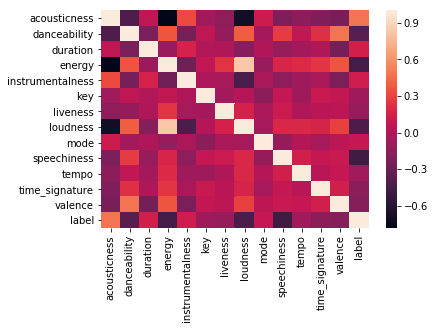

In [5]:
# Test various things

import seaborn as sns
%matplotlib inline


test = songs.corr()
test["label"]

print(label)

test["label"].sort_values(ascending=False)




# calculate the correlation matrix
corr = songs.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

428    0
490    1
53     0
336    0
154    1
393    1
199    1
109    0
7      1
232    1
463    1
297    1
455    1
460    0
188    1
223    0
371    1
353    1
114    0
431    1
215    0
165    1
28     1
269    1
180    1
236    1
414    1
307    1
68     1
205    1
      ..
51     1
363    0
426    0
260    1
102    1
195    0
167    1
293    1
116    0
124    1
404    1
218    1
287    1
319    1
47     1
213    0
492    0
95     1
433    1
162    0
263    1
360    0
75     0
466    0
299    1
22     0
72     0
493    1
15     0
168    0
Name: label, Length: 400, dtype: int32


train song  600
train label  600
test song  150
test label  150


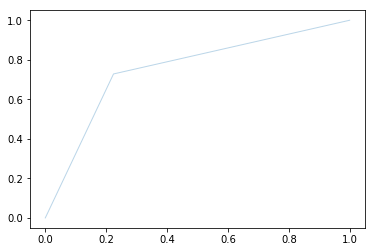

In [6]:
songs

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713000,0.514,100125,0.5210,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192000,0.714,207019,0.6140,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333000,0.630,216200,0.4550,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601000,0.810,136413,0.2210,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883000,0.465,181440,0.4590,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1
5,0.524000,0.633,244360,0.4010,0.000000,4,0.1230,-12.549,1,0.0439,134.978,4,0.523,1
6,0.597000,0.507,183573,0.7950,0.000000,9,0.2960,-6.966,1,0.0607,165.540,4,0.900,0
7,0.452000,0.825,259102,0.4350,0.609000,1,0.0953,-9.582,1,0.0568,119.038,4,0.243,1
8,0.748000,0.420,366179,0.3240,0.839000,9,0.0723,-14.700,0,0.0556,183.020,3,0.330,1
9,0.913000,0.292,197613,0.2460,0.088300,0,0.2090,-9.758,1,0.0330,140.316,4,0.249,1
